# Movie Analytics

## Import All modules

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Display Data

### Import Dataframe

In [3]:
dataframe = pd.read_csv('movies_metadata.csv')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

#### Get a sample data

In [5]:
# Take a sample of the data
dataframe.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14191,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10769, 'n...",NaN,25532,tt0479354,es,Crónica de una fuga,The true story of four men who narrowly escape...,...,2006-01-01,0.0,103.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,An Inside View of Political Detainees,Chronicle of an Escape,False,6.2,16.0
39019,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,135652,tt1957867,en,Christmas in Compton,"Big Earl, the owner of a Christmas tree lot in...",...,2012-11-09,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Christmas in Compton,False,4.0,2.0
25284,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,74092,tt1836099,ko,파수꾼,There were three friends. Someone became the a...,...,2010-02-03,0.0,117.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Bleak Night,False,7.9,14.0
19561,True,"{'id': 357173, 'name': 'Sinister Collection', ...",3000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,82507,tt1922777,en,Sinister,Found footage helps a true-crime novelist real...,...,2012-03-29,77712439.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Once you see him, nothing can save you.",Sinister,False,6.8,1611.0
12855,True,NaN,15000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,5038,tt0497465,en,Vicky Cristina Barcelona,Two girlfriends on a summer holiday in Spain b...,...,2008-08-15,96408652.0,96.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Life is the ultimate work of art,Vicky Cristina Barcelona,False,6.7,1050.0
40954,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,381040,tt4550420,en,My Blind Brother,Love for the same woman causes conflict betwee...,...,2016-09-19,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Romantically Challenged.,My Blind Brother,False,6.2,19.0
18603,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,51578,tt0061029,cs,Happy end,A dark comedy about a murder and its consequen...,...,1967-09-01,0.0,71.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Happy End,False,7.2,11.0
6208,True,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,42017,tt0090585,en,Absolute Beginners,A musical adaptation of Colin MacInnes' novel ...,...,1986-01-01,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the world of your dreams!,Absolute Beginners,False,5.9,14.0
42699,True,"{'id': 114374, 'name': 'Fist of the North Star...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",NaN,109080,tt0456980,ja,真救世主伝説 北斗の拳 ラオウ伝 殉愛の章,A film adaptation of the Holy Emperor story ar...,...,2006-03-11,862.0,95.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Fist of the North Star: Legend of Raoh - Chapt...,False,6.5,12.0
30014,True,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,20870,tt0072613,ru,Афоня,"The 1975 film by Georgi Daneliya ""Afonya"" was ...",...,1975-10-13,0.0,92.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Afonya,False,6.9,16.0


In [6]:
dataframe.index

RangeIndex(start=0, stop=45463, step=1)

In [12]:
# Set index as movie titles
dataframe.set_index('title', inplace=True)

In [13]:
dataframe

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,343554033.0
Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0
Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0
Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0
Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subdue,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0,0.0
Century of Birthing,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0,0.0
Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0,0.0


In [14]:
# Get the dataframe
dataframe.loc['Tom and Huck']

adult                                                                 True
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
homepage                                                               NaN
id                                                                   45325
imdb_id                                                          tt0112302
original_language                                                       en
original_title                                                Tom and Huck
overview                 A mischievous young boy, Tom Sawyer, witnesses...
popularity                                                        2.561161
poster_path                               /sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg
production_companies           [{'name': 'Walt Disney Pictures', 'id': 2}]
production_countries     

In [16]:
# Reset the index
dataframe.reset_index(inplace=True)
dataframe

,index,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,343554033.0
1,1,Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0
2,2,Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0
3,3,Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0
4,4,Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,45458,Subdue,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0,0.0
45459,45459,Century of Birthing,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0,0.0
45460,45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0,0.0
45461,45461,Satan Triumphant,True,NaN,0,[],NaN,227506,tt0008536,en,...,1917-10-21,0.0,87.0,[],Released,NaN,False,0.0,0.0,0.0


### Generate the index

In [8]:
dataframe1 = dataframe.head()

#### Get profit chart

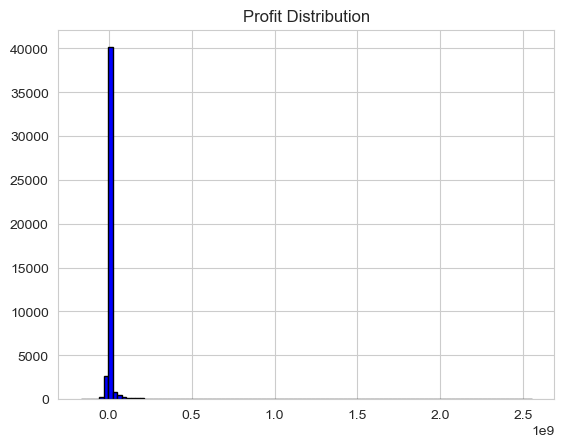

In [9]:
# Now, we check profit column in dataframe
dataframe['profit'] = dataframe['revenue'] - dataframe['budget']

# Set the style using seaborn
sns.set_style('whitegrid')

# Plotting the profit distribution
dataframe['profit'].hist(bins=100, color='blue', edgecolor='black')
plt.title("Profit Distribution")
plt.show()

In [10]:
# Now we describe the profit column

dataframe["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

### Display the data using boxplot seaborn

<Axes: >

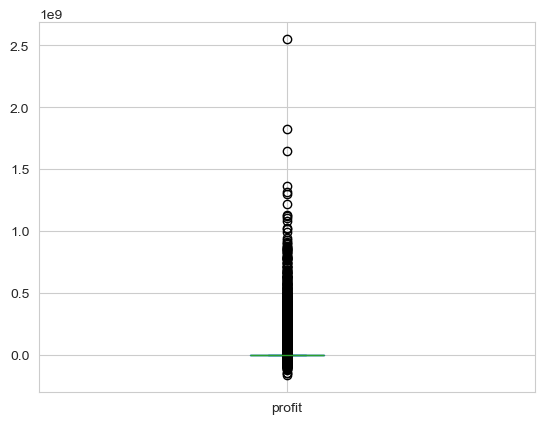

In [11]:
dataframe["profit"].plot(kind = "box")

### Display Profitable Movies

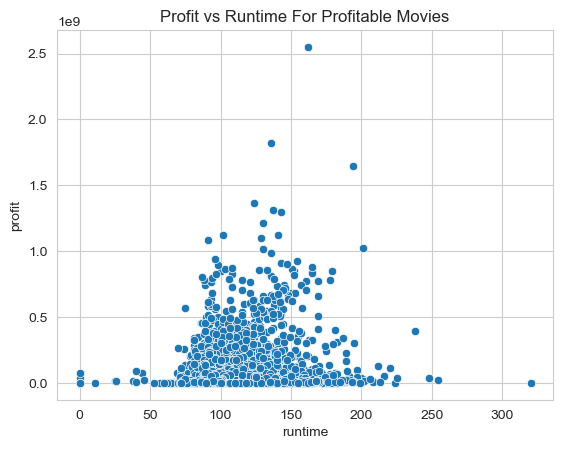

In [17]:
# Check for profitable movies
profitable_movies = dataframe[dataframe['profit'] > 0]
sns.scatterplot(data=profitable_movies, 
                x = 'runtime',
                y = 'profit')
plt.title("Profit vs Runtime For Profitable Movies")
plt.show()

### Show Movies Rating

In [18]:
# Now, we load the ratings data
rating = pd.read_csv('ratings_small.csv')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<Axes: xlabel='rating', ylabel='Count'>

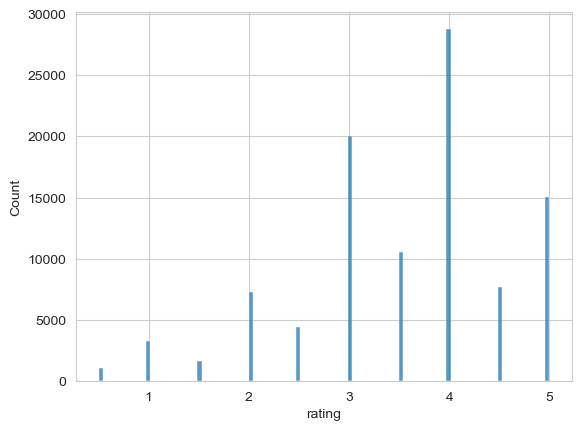

In [19]:
# Make histplot of rating values using seaborn
sns.histplot(data = rating, x = 'rating') 